<a href="https://colab.research.google.com/github/Jumamurod-Aralov/Galaxy-Shooter-Game-Remake/blob/main/SIFT_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import matplotlib.pyplot as plt
import urllib.request

# Download images from URL
url1 = "https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg"
url2 = "https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg"

urllib.request.urlretrieve(url1, "image1.jpg")
urllib.request.urlretrieve(url2, "image2.jpg")

# Now load them
img1 = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

print("Loaded:", img1.shape, img2.shape)


Loaded: (683, 1024) (683, 1024)


Number of keypoints in image1: 5347
Number of keypoints in image2: 4239
Number of good matches: 1103


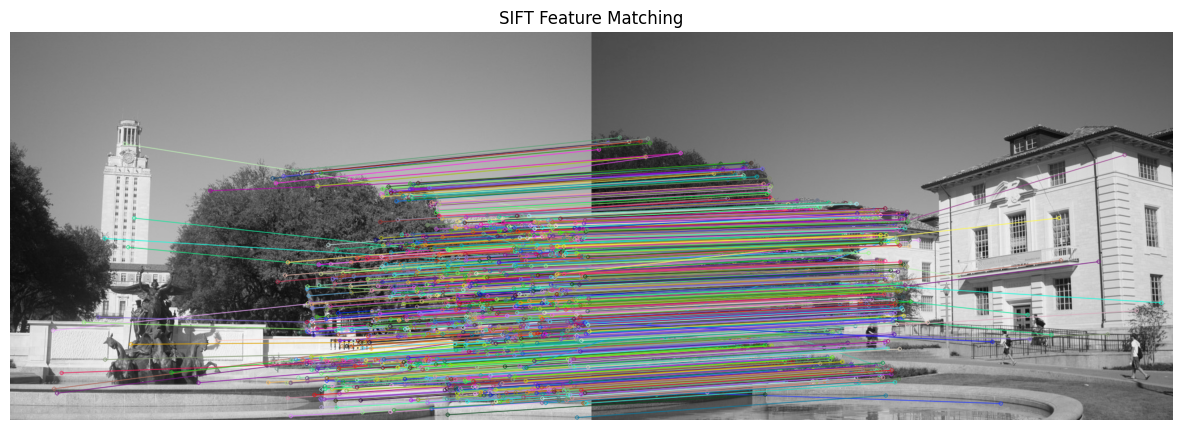

In [5]:
import cv2
import matplotlib.pyplot as plt

# === Load two images (replace with your own file paths) ===
img1 = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)  # Query image
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)  # Train image

# Check if images loaded
if img1 is None or img2 is None:
    raise ValueError("Error: One or both images not found. Check file paths!")

# === Initialize SIFT detector ===
sift = cv2.SIFT_create()

# === Detect keypoints and descriptors ===
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

print("Number of keypoints in image1:", len(kp1))
print("Number of keypoints in image2:", len(kp2))

# === Brute-Force Matcher with k-NN ===
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# === Apply Lowe's ratio test to filter good matches ===
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print("Number of good matches:", len(good_matches))

# === Draw matches ===
result_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# === Show result ===
plt.figure(figsize=(15, 7))
plt.imshow(result_img)
plt.title("SIFT Feature Matching")
plt.axis("off")
plt.show()
